### Task 01. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### Import data

In [3]:
path = r'C:\Users\mgril\OneDrive\Desktop\Instacart Basket Analysis Folder'

In [4]:
df_merge_cust_ords = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data', 'df_merge_cust_ords_.pkl'))

In [5]:
df_merge_cust_ords.head()

,user_id,first_name,last_name,sex,state,age,date_joined,dependents,fam_status,income,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Least busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [6]:
df_merge_cust_ords.shape

(16202429, 30)

### Task 02. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [7]:
#drop name columns for PII concerns
columns_to_drop = ['first_name', 'last_name']

In [8]:
df_merge_cust_ords = df_merge_cust_ords.drop(columns=columns_to_drop)

In [9]:
df_merge_cust_ords.head()

,user_id,sex,state,age,date_joined,dependents,fam_status,income,order_id,order_number,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Mid-range product,Regularly busy,Least busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [10]:
df_merge_cust_ords.shape

(16202429, 28)

### Task 03. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [11]:
# Define regions
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [12]:
# Assigning States in the 'state' column to a specific region

df_merge_cust_ords.loc[df_merge_cust_ords['state'].isin(Northeast), 'region'] = 'Northeast'
df_merge_cust_ords.loc[df_merge_cust_ords['state'].isin(Midwest), 'region'] = 'Midwest'
df_merge_cust_ords.loc[df_merge_cust_ords['state'].isin(South), 'region'] = 'South'
df_merge_cust_ords.loc[df_merge_cust_ords['state'].isin(West), 'region'] = 'West'

In [13]:
# Checking Totals for regions

df_merge_cust_ords['region'].value_counts(dropna = False)

region
South        5397660
West         4148642
Midwest      3796773
Northeast    2859354
Name: count, dtype: int64

In [14]:
# Checking Headers

df_merge_cust_ords.head()

,user_id,sex,state,age,date_joined,dependents,fam_status,income,order_id,order_number,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Regularly busy,Least busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest


#### Checking for variations in spending habits by region

In [15]:
crosstab = pd.crosstab(df_merge_cust_ords['region'], df_merge_cust_ords['spending_flag'], dropna = False)

In [16]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,61948,3734825
Northeast,43068,2816286
South,85836,5311824
West,64426,4084216


### The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [17]:
# Creating flag for customers with less than 5 orders

df_merge_cust_ords.loc[df_merge_cust_ords['max_order'] < 5, 'customer_activity'] = 'low activity'

In [18]:
# Creating flag for customers with 5 orders or more

df_merge_cust_ords.loc[df_merge_cust_ords['max_order'] >= 5, 'customer_activity'] = 'high activity'

In [19]:
df_merge_cust_ords['customer_activity'].value_counts(dropna = False)

customer_activity
high activity    15523608
low activity       678821
Name: count, dtype: int64

In [20]:
# Assigning low activity profiles to new dataframe

low_activity_customers = df_merge_cust_ords[df_merge_cust_ords['customer_activity'] == 'low activity']

In [25]:
# Export and save low activity profiles

low_activity_customers.to_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [21]:
# Assigning high activity profiles to new dataframe

high_activity_customers = df_merge_cust_ords[df_merge_cust_ords['customer_activity'] == 'high activity']

In [27]:
# Export and save high activity profiles

high_activity_customers.to_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

In [22]:
df_merge_cust_ords.head()

,user_id,sex,state,age,date_joined,dependents,fam_status,income,order_id,order_number,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,region,customer_activity
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Least busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity


In [29]:
# Continuing analysis with new 'high_active_customers' Dataframe.
high_activity_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

### Task 05. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

#### Breaking down relevant age groups for analysis

In [23]:
high_activity_customers.loc[high_activity_customers['age'] <= 29, 'age_group'] = '18-29'
high_activity_customers.loc[(high_activity_customers['age'] > 29) & (high_activity_customers['age'] < 40), 'age_group'] = '30-39'
high_activity_customers.loc[(high_activity_customers['age'] > 39) & (high_activity_customers['age'] < 50), 'age_group'] = '40-49'
high_activity_customers.loc[(high_activity_customers['age'] > 49) & (high_activity_customers['age'] < 60), 'age_group'] = '50-59'
high_activity_customers.loc[(high_activity_customers['age'] > 59) & (high_activity_customers['age'] < 70), 'age_group'] = '60-69'
high_activity_customers.loc[high_activity_customers['age'] > 69, 'age_group'] = '70 and over'

C:\Users\mgril\AppData\Local\Temp\ipykernel_18164\626261039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_customers.loc[high_activity_customers['age'] <= 29, 'age_group'] = '18-29'


In [24]:
# Checking totals

high_activity_customers['age_group'].value_counts(dropna = False)

age_group
18-29          2910860
70 and over    2909361
40-49          2448874
30-39          2440894
50-59          2424460
60-69          2389159
Name: count, dtype: int64

In [25]:
# Checking headers
high_activity_customers.head()

,user_id,sex,state,age,date_joined,dependents,fam_status,income,order_id,order_number,...,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,region,customer_activity,age_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49


#### Income groups

In [26]:
high_activity_customers.loc[high_activity_customers['income'] <= 75000, 'income_group'] = 'Lower'
high_activity_customers.loc[(high_activity_customers['income'] > 75000) & (high_activity_customers['income'] <= 120000), 'income_group'] = 'Middle'
high_activity_customers.loc[high_activity_customers['income'] > 120000, 'income_group'] = 'Upper'

C:\Users\mgril\AppData\Local\Temp\ipykernel_18164\2502358943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_customers.loc[high_activity_customers['income'] <= 75000, 'income_group'] = 'Lower'


In [27]:
# Check totals

high_activity_customers['income_group'].value_counts(dropna = False)

income_group
Middle    6036626
Lower     4874435
Upper     4612547
Name: count, dtype: int64

In [28]:
# Checking headers
high_activity_customers.head()

,user_id,sex,state,age,date_joined,dependents,fam_status,income,order_id,order_number,...,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,region,customer_activity,age_group,income_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49,Upper
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49,Upper
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49,Upper
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49,Upper
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49,Upper


#### Departments

In [33]:
# Importing department data

df_dept_t_new = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'))

In [34]:
df_dept_t_new

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [36]:
# Renaming column
df_dept_t_new = df_dept_t_new.rename(columns = {'Unnamed: 0' : 'department_id'})

In [37]:
df_dept_t_new

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [38]:
high_activity_customers.head()

,user_id,sex,state,age,date_joined,dependents,fam_status,income,order_id,order_number,...,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,region,customer_activity,age_group,income_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49,Upper
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49,Upper
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49,Upper
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49,Upper
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high activity,40-49,Upper


In [39]:
# Merging the departments dataframe with high_active_customers dataframe
df_merged = high_activity_customers.merge(df_dept_t_new, on = 'department_id')

In [40]:
# checking merge results
df_merged[['user_id', 'department_id', 'department']].head(5)

,user_id,department_id,department
0,26711,7,beverages
1,26711,7,beverages
2,26711,7,beverages
3,33890,7,beverages
4,33890,7,beverages


#### Dependents

In [43]:
# Creating a flag for number of dependents in a household

df_merged.loc[(df_merged['fam_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_merged['dependents'] ==0), 'customer_profile'] = 'Single adult'

df_merged.loc[(df_merged['fam_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_merged['dependents'] >0), 'customer_profile'] = 'Young parent'

df_merged.loc[(df_merged['fam_status']=='married') & (df_merged['dependents'] <=2), 'customer_profile'] = 'Family'

df_merged.loc[(df_merged['fam_status']=='married') & (df_merged['dependents'] >2), 'customer_profile'] = 'Big Family'

In [44]:
# Checking results
df_merged[['fam_status', 'dependents', 'customer_profile']].head(25)

,fam_status,dependents,customer_profile
0,married,3,Big Family
1,married,3,Big Family
2,married,3,Big Family
3,single,0,Single adult
4,single,0,Single adult
5,single,0,Single adult
6,married,2,Family
7,married,2,Family
8,married,2,Family
9,single,0,Single adult


In [45]:
df_merged['customer_profile'].value_counts(dropna = False)

customer_profile
Family          7243665
Single adult    3885206
Big Family      3655576
Young parent     739161
Name: count, dtype: int64

### Task 06. Create an appropriate visualization to show the distribution of profiles.

Text(0.5, 1.0, 'Distribution of Age Groups')

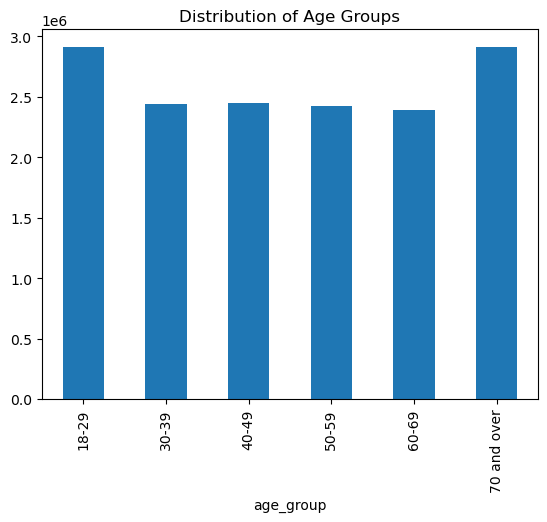

In [46]:
# Creating bar chart for 'age_category' 
bar_age_group = df_merged['age_group'].value_counts().sort_index().plot.bar()
plt.title('Distribution of Age Groups')

In [48]:
# Exporting bar chart.
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group.png'))

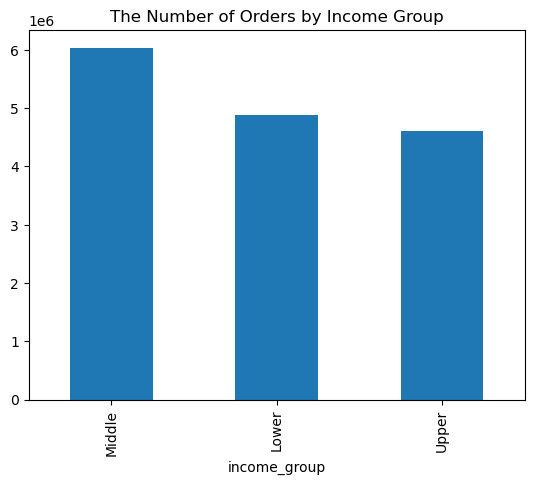

In [49]:
# Bar chart of income_group
bar_income_group = df_merged['income_group'].value_counts().plot.bar(title ='The Number of Orders by Income Group')

In [50]:
# Exporting bar chart
bar_income_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_group.png'))

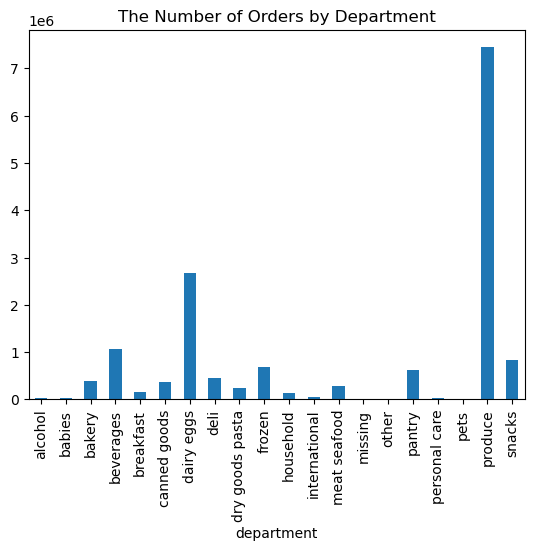

In [51]:
# Creating a bar chart for departments.
bar_department = df_merged['department'].value_counts().sort_index().plot.bar(title = 'The Number of Orders by Department')

In [52]:
# Exporting bar chart
bar_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments.png'))

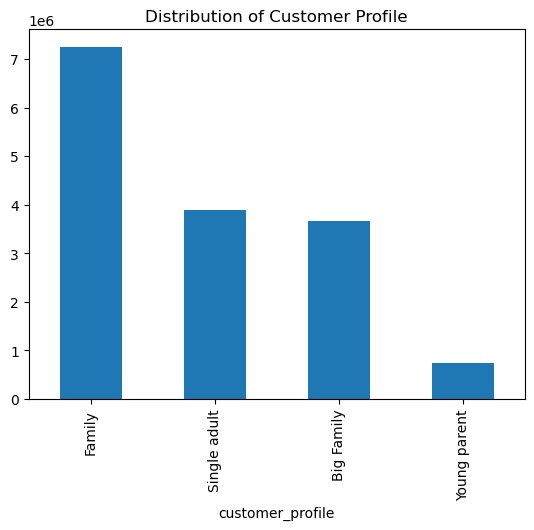

In [53]:
# Creating a bar chart for 'customer_profile'
bar_family_status = df_merged['customer_profile'].value_counts().plot.bar(title = 'Distribution of Customer Profile')

In [54]:
# Exporting bar chart
bar_family_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_status.png'))

### Task 07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [55]:
age_group_agg = df_merged.groupby('age_group',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [56]:
age_group_agg

days_since_prior_order                  prices                    
                               min   max       mean    min      max       mean
age_group                                                                     
18-29                          0.0  30.0  10.679965    1.0  14900.0  12.226975
30-39                          0.0  30.0  10.676205    1.0  14900.0  11.527096
40-49                          0.0  30.0  10.678318    1.0  14900.0  12.250436
50-59                          0.0  30.0  10.713425    1.0  14900.0  11.878136
60-69                          0.0  30.0  10.676569    1.0  14900.0  11.793079
70 and over                    0.0  30.0  10.688081    1.0  14900.0  12.197226

#### Income group of customers

In [57]:
# Aggregate min. max. and mean on customer's 'income_class' for usage and expenditure.
income_group_agg = df_merged.groupby('income_group',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [58]:
income_group_agg

days_since_prior_order                  prices           \
                                min   max       mean    min      max   
income_group                                                           
Lower                           0.0  30.0  10.751395    1.0  14900.0   
Middle                          0.0  30.0  10.656530    1.0  14900.0   
Upper                           0.0  30.0  10.653323    1.0  14900.0   

                         
                   mean  
income_group             
Lower          7.651196  
Middle         9.404443  
Upper         19.971739

#### Dependents

In [59]:
# Aggregate min. max. and mean on customer's 'customer_profile' for usage and expenditure.
customer_profile_agg = df_merged.groupby('customer_profile',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [60]:
customer_profile_agg

days_since_prior_order                  prices           \
                                    min   max       mean    min      max   
customer_profile                                                           
Big Family                          0.0  30.0  10.710925    1.0  14900.0   
Family                              0.0  30.0  10.691914    1.0  14900.0   
Single adult                        0.0  30.0  10.656319    1.0  14900.0   
Young parent                        0.0  30.0  10.646888    1.0  14900.0   

                             
                       mean  
customer_profile             
Big Family        12.004841  
Family            12.187670  
Single adult      11.729747  
Young parent      11.427091

#### Departments

In [61]:
# Aggregate min. max. and mean on customer's 'customer_profile' for usage and expenditure.
department_customer_profile_agg = df_merged.groupby(['customer_profile', 'department'])[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [62]:
department_customer_profile_agg

days_since_prior_order                  prices  \
                                                  min   max       mean    min   
customer_profile department                                                     
Big Family       alcohol                          0.0  30.0   9.733798    1.2   
                 babies                           0.0  30.0   9.811232    1.8   
                 bakery                           0.0  30.0  10.832851    1.1   
                 beverages                        0.0  30.0  10.778320    1.0   
                 breakfast                        0.0  30.0  11.135917    1.0   
...                                               ...   ...        ...    ...   
Young parent     pantry                           0.0  30.0  10.430369    1.0   
                 personal care                    0.0  30.0  10.823198    1.3   
                 pets                             1.0  30.0  10.530387    3.6   
                 produce                          0.0  30.0  10.527283    1.0   
                 snacks                           0.0  30.0  10.684688    1.6   

                                                
                                 max      mean  
customer_profile department                     
Big Family       alcohol        15.0  8.796315  
                 babies         14.5  6.112789  
                 bakery         14.8  7.460642  
                 beverages      14.9  7.846238  
                 breakfast      14.8  9.014279  
...                              ...       ...  
Young parent     pantry         14.9  8.171240  
                 personal care  14.3  6.699467  
                 pets           13.8  9.202902  
                 produce        15.0  7.962423  
                 snacks          7.0  4.236309  

[80 rows x 6 columns]

In [63]:
department_customer_profile_agg

days_since_prior_order                  prices  \
                                                  min   max       mean    min   
customer_profile department                                                     
Big Family       alcohol                          0.0  30.0   9.733798    1.2   
                 babies                           0.0  30.0   9.811232    1.8   
                 bakery                           0.0  30.0  10.832851    1.1   
                 beverages                        0.0  30.0  10.778320    1.0   
                 breakfast                        0.0  30.0  11.135917    1.0   
...                                               ...   ...        ...    ...   
Young parent     pantry                           0.0  30.0  10.430369    1.0   
                 personal care                    0.0  30.0  10.823198    1.3   
                 pets                             1.0  30.0  10.530387    3.6   
                 produce                          0.0  30.0  10.527283    1.0   
                 snacks                           0.0  30.0  10.684688    1.6   

                                                
                                 max      mean  
customer_profile department                     
Big Family       alcohol        15.0  8.796315  
                 babies         14.5  6.112789  
                 bakery         14.8  7.460642  
                 beverages      14.9  7.846238  
                 breakfast      14.8  9.014279  
...                              ...       ...  
Young parent     pantry         14.9  8.171240  
                 personal care  14.3  6.699467  
                 pets           13.8  9.202902  
                 produce        15.0  7.962423  
                 snacks          7.0  4.236309  

[80 rows x 6 columns]

### Task 08. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [64]:
# Checking the relationship of 'age_category' & 'income_class' of customers profile in differnet regions.
profile_age_region = df_merged.groupby('region')[['income_group','age_group']].value_counts().reset_index(name='count')

In [65]:
profile_age_region

,region,income_group,age_group,count
0,Midwest,Lower,18-29,404955
1,Midwest,Lower,30-39,356248
2,Midwest,Upper,70 and over,309710
3,Midwest,Upper,50-59,275080
4,Midwest,Middle,70 and over,269872
...,...,...,...,...
67,West,Lower,70 and over,113401
68,West,Lower,50-59,95929
69,West,Lower,60-69,88871
70,West,Upper,18-29,6101


In [66]:
# Checking income_class by regions
region_income = pd.crosstab(df_merged['income_group'],df_merged['region'], dropna = False)

In [67]:
region_income

region,Midwest,Northeast,South,West
income_group,,,,
Lower,1128622,848137,1638258,1259418
Middle,1409389,1072504,2016463,1538270
Upper,1099879,816295,1516265,1180108


### Task 09. Produce suitable charts to illustrate your results and export them in your project folder.

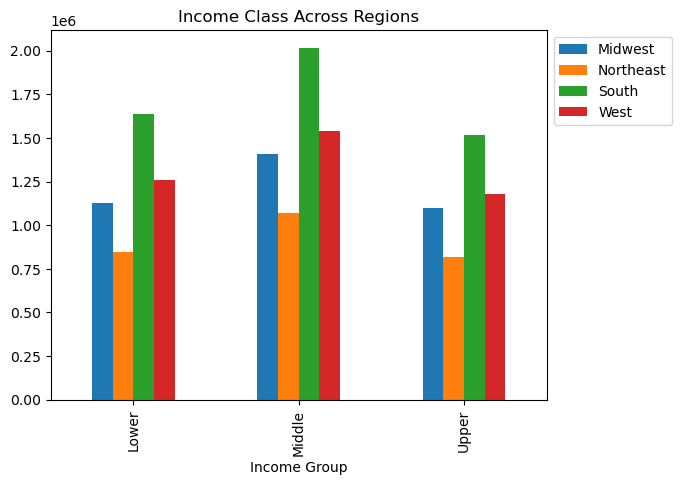

In [68]:
# Visualtization of 'income_class' and 'region'
bar_region_income = region_income.plot.bar(title = 'Income Class Across Regions')
plt.xlabel("Income Group")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [69]:
# Export bar chart
bar_region_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_income.png'))

In [70]:
# Creating a stacked bar chart to see relationship between 'departments' and 'customers_profile'
customer_family_department = df_merged.groupby(['department', 'customer_profile']).size().unstack(fill_value=0)

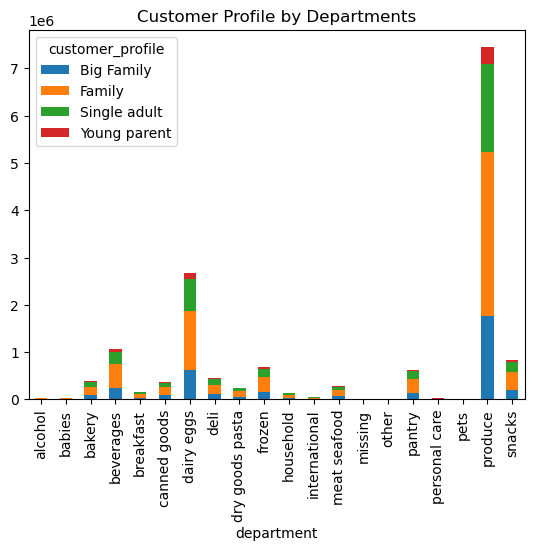

In [71]:
#stacked bar graph
stacked_family_department = customer_family_department.plot.bar(stacked = True, title = 'Customer Profile by Departments')

In [72]:
# Export stacked bar chart
stacked_family_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_family_department.png'))

In [73]:
# Create a crosstab to count the occurrences of age categories in each department
cross_tab_age_group = pd.crosstab(df_merged['department'], df_merged['age_group'])

<Figure size 1200x600 with 0 Axes>

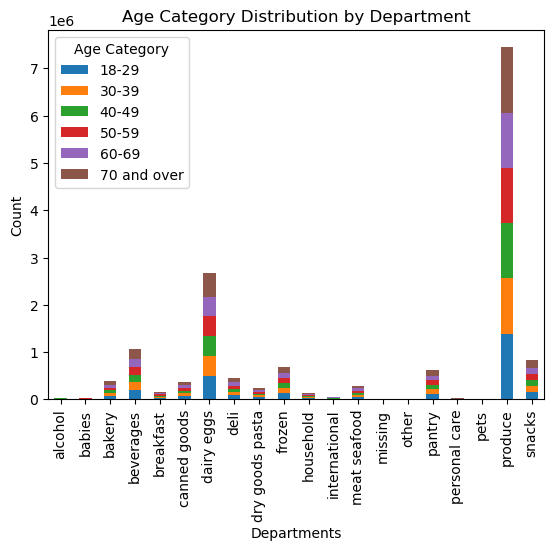

In [74]:
# Creating a clustered bar chart
plt.figure(figsize=(12, 6))
clustered_cross_tab_age_group = cross_tab_age_group.plot(kind='bar', stacked=True, title='Age Category Distribution by Department')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.legend(title='Age Category')

In [75]:
# Exporting clustered bar chart
clustered_cross_tab_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'clustered_cross_tab_age_group.png',))

In [76]:
# Checking customer_profile by region
customer_by_region = pd.crosstab(df_merged['customer_profile'],df_merged['region'], dropna = False)

In [77]:
customer_by_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Big Family,838043,649806,1213817,953910
Family,1711015,1282800,2409204,1840646
Single adult,915030,676874,1294674,998628
Young parent,173802,127456,253291,184612


Text(0.5, 1.0, 'Customer Profile Distribution by Region')

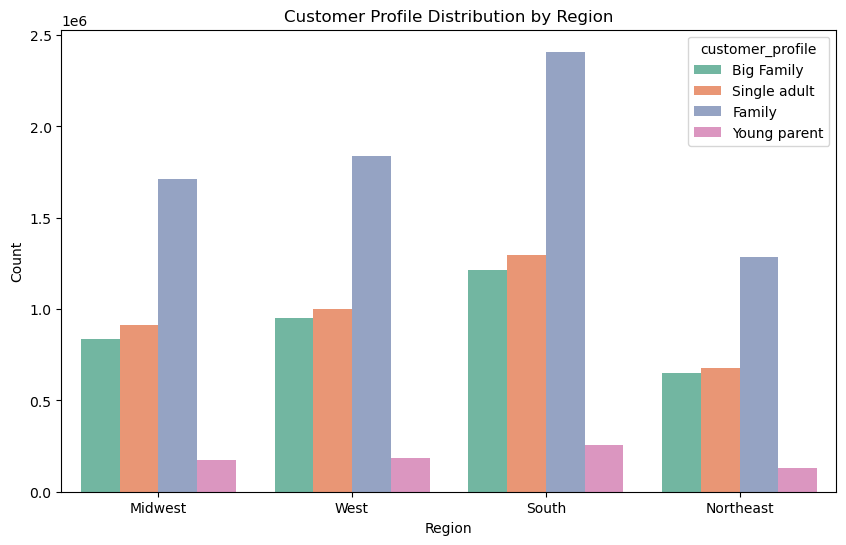

In [78]:
# Create a countplot to visualize the distribution of 'customer_profile' in each 'region'
plt.figure(figsize=(10, 6))
countplot_customer_by_region = sns.countplot(x='region', hue='customer_profile', data=df_merged, palette='Set2')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Customer Profile Distribution by Region')

In [79]:
# exporting Countplot bar chart
countplot_customer_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'countplot_customer_by_region.png'))

### Task 10. Tidy up your script, export your final data set, and save your notebook.

In [80]:
# Export Dataframe
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_dept_merged.pkl'))